In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

init_notebook_mode(connected=True)


In [3]:
t=pd.read_csv('tesla.csv')
t.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
t.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
t.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

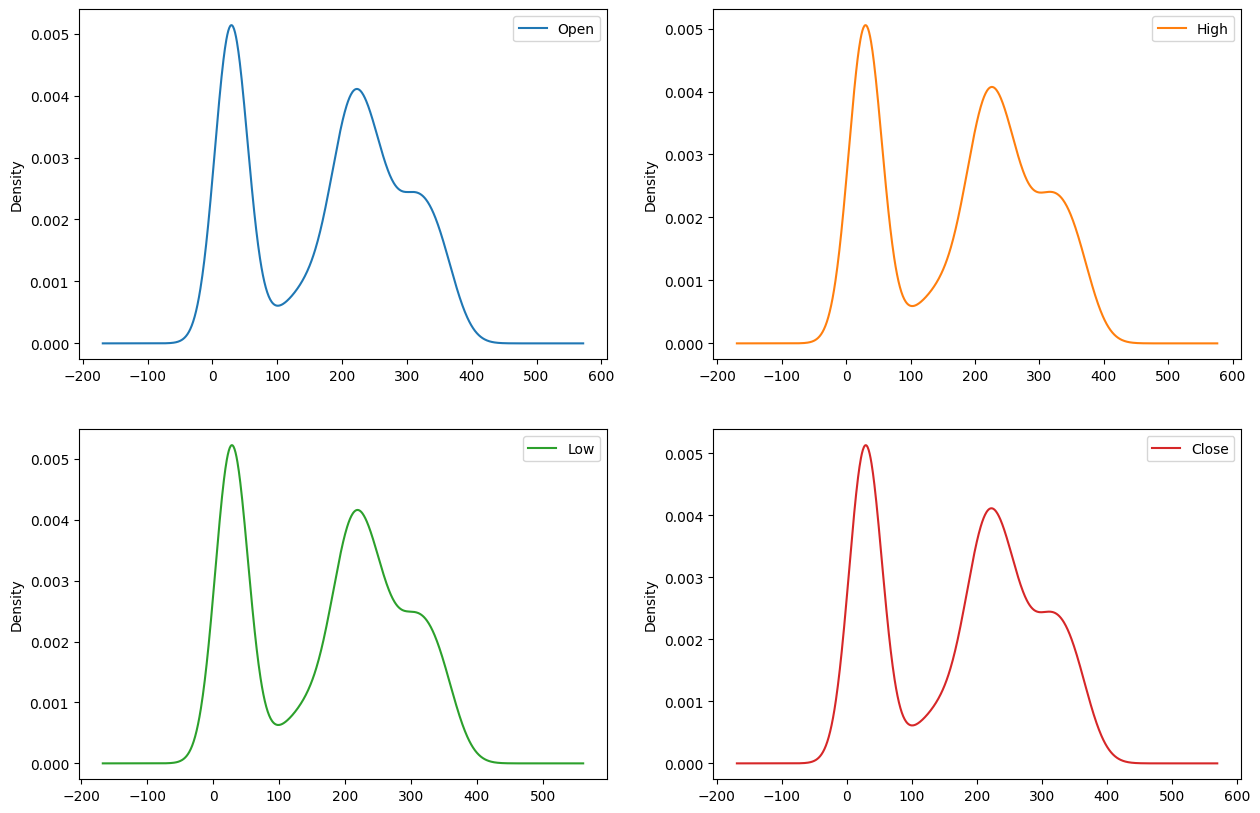

In [26]:
t[['Open','High','Low','Close']].plot(kind='density',subplots=True,layout=(2,2),figsize=(15,10),sharex=False)

In [8]:
t['Date']=pd.to_datetime(t['Date'])

C:\Users\Guru Dharsan T\AppData\Local\Temp\ipykernel_33176\468521008.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [9]:
t.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


In [10]:
layout= go.Layout(
    title='stock prediction',
    xaxis=dict(
        title='date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='close',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'      
      )
    )
)
t_data=[{'x':t['Date'],'y':t['High']}]
fig= go.Figure(data=t_data,layout=layout)

In [11]:
iplot(fig)

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#model evaluvation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [13]:
X=np.array(t.index).reshape(-1,1)
Y=t['High']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [14]:
np.array(t.index).reshape(-1,1)

array([[   0],
       [   1],
       [   2],
       ...,
       [2190],
       [2191],
       [2192]], dtype=int64)

In [15]:
scalar = StandardScaler().fit(X_train)

In [16]:
# mean of 2,4,4,4,5,5,7,9 is 5
# standard deviation
# (2-5)^2,(4-5)^2.......
#take all the element got in the previous step
#find the mean of the got elements
# it is 4
# root of 4 is 2

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# lm Y=g(x)=alpha(x)+beta
# alpha is the slope
#beta is the intercept

In [19]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [20]:
trace0= go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,

    mode='lines',
    name='Predicted'
)
t_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=t_data,layout=layout)

In [21]:
iplot(plot2)

In [22]:
scores =f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8673025279360352	0.8601865867295215
MSE       1857.4032418308777	1850.6239577133933



In [83]:
#mse= 1/n sumation of i=1 to n (y(i)-x(i))^2
# n is number of data points
#y(i) is the actual value
#x(i) is the predicted value

In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
sentence="iam happy"
print(sia.polarity_scores(sentence))

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}


In [25]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


sentence = input("Enter a sentence: ")

scores = sia.polarity_scores(sentence)


print(f"Negative score: {scores['neg']}")
print(f"Neutral score: {scores['neu']}")
print(f"Positive score: {scores['pos']}")


if scores['compound'] >= 0.05:
    print("Overall sentiment: Positive")
elif scores['compound'] <= -0.05:
    print("Overall sentiment: Negative")
else:
    print("Overall sentiment: Neutral")

[nltk_data] Downloading package vader_lexicon to C:\Users\Guru Dharsan
[nltk_data]     T\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Negative score: 0.0
Neutral score: 0.0
Positive score: 1.0
Overall sentiment: Positive


In [30]:
import pandas as pd
import numpy as np
a=pd.read_csv('tesla.csv')
a.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [53]:
b=np.array([[(2,3),(3,4)],[(2,3),(3,4)],[(5,6),(7,9)]])

In [55]:
b

array([[[2, 3],
        [3, 4]],

       [[2, 3],
        [3, 4]],

       [[5, 6],
        [7, 9]]])

In [ ]:
print(b.ndim)

In [51]:
c=np.array([(2,4),(3,4)])

In [64]:
c[0]+c[1]

array([5, 8])

In [47]:
e=np.array([1,2,3,4,5,6,7,8,9],ndmin=4,dtype='float64')

In [48]:
e

array([[[[1., 2., 3., 4., 5., 6., 7., 8., 9.]]]])

In [56]:
a=np.array([4,5])

In [57]:
a.ndim

1

In [58]:
m=np.array(4)

In [59]:
m.ndim

0

In [78]:
a={'a':[1],'b':[2],'c':[3]}

In [79]:
b=pd.DataFrame(a)

In [81]:
print(a)

{'a': [1], 'b': [2], 'c': [3]}


In [76]:
n=[1,2,3]
o=pd.DataFrame(n)

In [77]:
o

,0
0,1
1,2
2,3


In [1]:
from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, 
      random_state=1 )
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 3) 
classifier_knn.fit(X_train, 
      y_train)
sample = [[5, 5, 3, 2], [2, 4, 3, 5]] 
preds = classifier_knn.predict(sample) 
print(preds)
pred_species = [iris.target_names[p] for p in preds] 
print("Predictions:", pred_species)


[1 2]
Predictions: ['versicolor', 'virginica']


In [2]:
from sklearn import metrics 
ssifier_knn = KNeighborsClassifier(n_neighbors = 3) 
ssifier_knn.fit(X_train, y_train) 

y_pred = classifier_knn.predict(X_test) 
print(y_pred)
print(y_test)
 




[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1]


In [3]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [4]:
print("Precision:", metrics.precision_score(y_pred,y_test,average='weighted'))

Precision: 0.9841666666666666


In [5]:
print('Recall', metrics.recall_score(y_pred,y_test, 
      average='weighted')) 

Recall 0.9833333333333333


In [8]:
from gurulearn import plot_linear_regression
plot_linear_regression("tata.csv","Date","Close","Date","Close")

c:\Users\Guru Dharsan T\AppData\Local\Programs\Python\Python311\Lib\site-packages\gurulearn\main.py:35: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [9]:
import pandas as pd 
import numpy as np
a= pd.read_csv("tesla.csv")
a

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200
